<a href="https://colab.research.google.com/github/JavZon/Classification-Algoritms/blob/main/K-nn_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Predicting **Breast cancer** dataset using k-nn algorithm

In [1]:
import numpy as np
import pandas as pd

In [2]:
link='https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv'
df=pd.read_csv(link)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.shape

(569, 32)

**Visualization**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

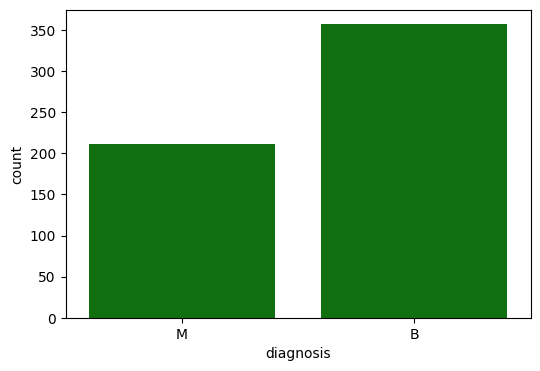

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis',data=df,color='g')
plt.show()

In [7]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


As seen from the info **M** means **Malignant** (which is cancer) and **B** means **Benign** (which is not cancer). So we replace them with 1 for M and 0 for B

In [9]:
df['diagnosis']=df['diagnosis'].replace({'M':1, 'B':0})
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [10]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

We don't need id column as this column does not affect to our result(breast cancer) in any way.

In [15]:
df.drop('id',axis=1,inplace=True)
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


**Correlation**

In [18]:
corr=df.corrwith(df['diagnosis']).sort_values(ascending=False)
corr

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

The correlation table depicts that even if we have 32 column in our dataset only 12 of them have **strong(or medium)** & (**corr>0.50**) correlation with final result( diagnosis). So we drop unnecessary columns so that our model will not be too complex

In [23]:
ind=corr.index[corr.abs()>0.5]
ind

Index(['diagnosis', 'concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se',
       'area_se'],
      dtype='object')

In [25]:
df=df[ind]
df.head(2)

,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se
0,1,0.2654,184.6,0.14710,25.38,122.8,2019.0,17.99,1001.0,0.3001,0.7119,0.27760,0.6656,1.0950,8.589,153.40
1,1,0.1860,158.8,0.07017,24.99,132.9,1956.0,20.57,1326.0,0.0869,0.2416,0.07864,0.1866,0.5435,3.398,74.08


We scale the values of our df using **StandardScaler** from sklearn preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=df.drop('diagnosis',axis=1)
y=df['diagnosis'].copy()
X=scaler.fit_transform(X)

In [27]:
X[:1]

array([[2.29607613, 2.30360062, 2.53247522, 1.88668963, 1.26993369,
        2.00123749, 1.09706398, 0.9843749 , 2.65287398, 2.10952635,
        3.28351467, 2.61666502, 2.48973393, 2.83303087, 2.48757756]])

**Train/Test_Split**

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train_label,y_test_label=train_test_split(X,y, test_size=0.1,random_state=53)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train_label.shape)
print(y_test_label.shape)

(512, 15)
(57, 15)
(512,)
(57,)


**k-nn** algorithm

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)  # k - number of neighbors

knn.fit(X_train,y_train_label)    # we train our model

KNeighborsClassifier()

**Prediction**

In [35]:
y_pred=knn.predict(X_test)

**Evaluation**

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score

conf_matrix=confusion_matrix(y_test_label,y_pred)
acc_score=accuracy_score(y_test_label,y_pred)
f1_score=f1_score(y_test_label,y_pred)
recall_score=recall_score(y_test_label,y_pred)
precision_score=precision_score(y_test_label,y_pred)

print('Confusion Matrix:\n',conf_matrix)
print('Accuracy Score:',acc_score)
print('F1 Score:',f1_score)
print('Recall Score:',recall_score)
print('Precision Score:',precision_score)


Confusion Matrix:
 [[35  1]
 [ 0 21]]
Accuracy Score: 0.9824561403508771
F1 Score: 0.9767441860465117
Recall Score: 1.0
Precision Score: 0.9545454545454546


In [40]:
class_report=classification_report(y_test_label,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.95      1.00      0.98        21

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X,y,cv=5, scoring='f1')


array([0.88095238, 0.89156627, 0.92682927, 0.91764706, 0.93975904])